#### For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week4-access-data

# Instructions for Accessing Data

The purpose of this Notebook is to provide access and insight to the many data sets available to this course. These data sets include:
- Project Gutenberg
- EDGAR
- Hansard
- US Congress
- Reddit
- Dallas City Council Minutes
- Houston City Council Minutes

Import the modules needed across multiple data sets:

In [1]:
import pandas as pd
import datetime as dt
import dask

## US Congress

US Congress data ([Stanford's Congressional Record](https://data.stanford.edu/congress_text)) is available on M2. If you use this data, please refer to the link for proper citation for the dataset.

The data lives within multiple text files. The following code merges these files into a single data frame.

> Note: as you read in the data you will see many `skipped line` warnings. This is okay. Jupyter is just telling you which lines we are skipping due to formatting errors.

In [2]:
import csv
import glob

directory = '/scratch/group/oit_research_data/stanford_congress/hein-bound/'
file_type = 'txt'
delim ='|'

speeches_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) 
                         for f in glob.glob(directory + "speeches_*"+file_type)])

descr_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) 
                      for f in glob.glob(directory + "descr_*"+file_type)])

all_congressional_data = pd.merge(speeches_df, descr_df, on='speech_id').fillna(0)

b'Skipping line 207724: expected 2 fields, saw 3\nSkipping line 208494: expected 2 fields, saw 5\n'
b'Skipping line 45205: expected 2 fields, saw 3\nSkipping line 96589: expected 2 fields, saw 3\n'
b'Skipping line 9177: expected 2 fields, saw 3\nSkipping line 9232: expected 2 fields, saw 3\nSkipping line 10391: expected 2 fields, saw 3\nSkipping line 10767: expected 2 fields, saw 3\nSkipping line 19439: expected 2 fields, saw 3\nSkipping line 20135: expected 2 fields, saw 3\nSkipping line 38635: expected 2 fields, saw 3\nSkipping line 46625: expected 2 fields, saw 3\nSkipping line 67408: expected 2 fields, saw 3\nSkipping line 96433: expected 2 fields, saw 3\nSkipping line 111918: expected 2 fields, saw 3\nSkipping line 126420: expected 2 fields, saw 3\nSkipping line 127531: expected 2 fields, saw 3\nSkipping line 142222: expected 2 fields, saw 3\n'
b'Skipping line 7466: expected 2 fields, saw 3\nSkipping line 73461: expected 2 fields, saw 3\nSkipping line 107105: expected 2 fields, sa

In [3]:
all_congressional_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,740000001,The Chair lays before the Senate the credentia...,S,19350103,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,48,51,01031935.txt,184,32
1,740000002,(John C. Crockett) proceeded to read the certi...,S,19350103,2,The Chief Clerk,Unknown,Unknown,Unknown,Special,52,54,01031935.txt,124,21
2,740000003,Mr. President. I suggest that credentials foun...,S,19350103,3,Mr. ROBINSON,Unknown,ROBINSON,Unknown,M,55,57,01031935.txt,153,30
3,740000004,Is there objection to the request? The Chair h...,S,19350103,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,58,62,01031935.txt,238,44
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394636,940382525,Mr. Speaker. it is a great personal honor for ...,E,19761001,4819,Mr. BIAGGI,Unknown,BIAGGI,Unknown,M,383002,383082,10011976.txt,2782,453
17394637,940382526,Mr. Speaker. given the fact that Chairman MADD...,E,19761001,4820,Mr. PHILLIP BURTON,PHILLIP,BURTON,Unknown,M,383088,383104,10011976.txt,337,60
17394638,940382527,Mr. Speaker. taie 94th Congress has officially...,E,19761001,4821,Mr. JOHNSON of California,Unknown,JOHNSON,California,M,383111,383127,10011976.txt,586,102
17394639,940382528,designateApril 24 as a National Day of Remembr...,E,19761001,4822,For.-......To,Unknown,......TO,Unknown,M,383248,383342,10011976.txt,6066,892


After loading the data, you can take a subset. The following code filters the speaker column for just the speaker "Mr. Dole."

In [4]:
women_congress = all_congressional_data[(all_congressional_data.gender == "F")].copy()

In [5]:
women_congress

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
384,740000385,Mr. Speaker. I ask unanimous consent to extend...,H,19350104,47,Mrs. KAHN,Unknown,KAHN,Unknown,F,4673,4674,01041935.txt,72,13
386,740000387,Mr. Speaker. as a matter of possible interest ...,H,19350104,49,Mrs. KAHN,Unknown,KAHN,Unknown,F,4677,4714,01041935.txt,2120,359
922,740000923,Will the gentleman yield?,H,19350109,62,Mrs. KAHN,Unknown,KAHN,Unknown,F,480,480,01091935.txt,25,4
924,740000925,I was going to ask why could not the other 40 ...,H,19350109,64,Mrs. KAHN,Unknown,KAHN,Unknown,F,483,484,01091935.txt,93,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394538,940382427,left the business world in 1941 and married Co...,E,19761001,4721,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,372647,372672,10011976.txt,869,140
17394543,940382432,Mr. Speaker. as I prepare to leave Congress I ...,E,19761001,4726,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,373161,373186,10011976.txt,951,156
17394545,940382434,Mr. Speaker. consumer legislation by its very ...,E,19761001,4728,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,373669,373736,10011976.txt,2407,404
17394550,940382439,Mr. Speaker. since coming to Congress 24 years...,E,19761001,4733,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,375061,375097,10011976.txt,1395,222


## Working with Our Data: Implementing KeyWords in Context (KWIC)

For this last exercise we will find keywords in context (KWIC). You can think of KWIC's output like the lines of a concordance. 

To produce this output, we will split the text into n-grams where "n" stands for any number. For example, a text split into single words (like our data frame in the previous example) is split into 1-grams (also just called "tokens"). 3-grams split the text into units that are 3 words long. 5-grams split the text into units that are 5 words long. 

Our example will use reddit data from November 2008. We will create a dictionary too see keyword "Obama" in context.

First read in the data and do a little cleaning.

In [6]:
all_congressional_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,740000001,The Chair lays before the Senate the credentia...,S,19350103,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,48,51,01031935.txt,184,32
1,740000002,(John C. Crockett) proceeded to read the certi...,S,19350103,2,The Chief Clerk,Unknown,Unknown,Unknown,Special,52,54,01031935.txt,124,21
2,740000003,Mr. President. I suggest that credentials foun...,S,19350103,3,Mr. ROBINSON,Unknown,ROBINSON,Unknown,M,55,57,01031935.txt,153,30
3,740000004,Is there objection to the request? The Chair h...,S,19350103,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,58,62,01031935.txt,238,44
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394636,940382525,Mr. Speaker. it is a great personal honor for ...,E,19761001,4819,Mr. BIAGGI,Unknown,BIAGGI,Unknown,M,383002,383082,10011976.txt,2782,453
17394637,940382526,Mr. Speaker. given the fact that Chairman MADD...,E,19761001,4820,Mr. PHILLIP BURTON,PHILLIP,BURTON,Unknown,M,383088,383104,10011976.txt,337,60
17394638,940382527,Mr. Speaker. taie 94th Congress has officially...,E,19761001,4821,Mr. JOHNSON of California,Unknown,JOHNSON,California,M,383111,383127,10011976.txt,586,102
17394639,940382528,designateApril 24 as a National Day of Remembr...,E,19761001,4822,For.-......To,Unknown,......TO,Unknown,M,383248,383342,10011976.txt,6066,892


In [7]:
# remove comments that have been deleted and thus have "deleted" as their text body
all_congressional_data = all_congressional_data[all_congressional_data['speech'] != '[deleted]']

# filter for just the subreddits we wish to operate on
gender_filter = ('F','...')
all_congressional_data = all_congressional_data[all_congressional_data['gender'].isin(gender_filter)]

# clean, clean, clean 
all_congressional_data['speech'] = all_congressional_data['speech'].str.lower() # transform words to lowercase
all_congressional_data['speech'] = all_congressional_data['speech'].str.replace('[^\w\s]','') # remove punctuation
all_congressional_data = all_congressional_data[~all_congressional_data['speech'].isna()] # remove blank comments

In [8]:
all_congressional_data['speech'] = all_congressional_data['speech'].str.split(" ")

In [9]:
all_congressional_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
4,740000005,"[secretary, of, state]",S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
384,740000385,"[mr, speaker, i, ask, unanimous, consent, to, ...",H,19350104,47,Mrs. KAHN,Unknown,KAHN,Unknown,F,4673,4674,01041935.txt,72,13
386,740000387,"[mr, speaker, as, a, matter, of, possible, int...",H,19350104,49,Mrs. KAHN,Unknown,KAHN,Unknown,F,4677,4714,01041935.txt,2120,359
922,740000923,"[will, the, gentleman, yield]",H,19350109,62,Mrs. KAHN,Unknown,KAHN,Unknown,F,480,480,01091935.txt,25,4
924,740000925,"[i, was, going, to, ask, why, could, not, the,...",H,19350109,64,Mrs. KAHN,Unknown,KAHN,Unknown,F,483,484,01091935.txt,93,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394538,940382427,"[left, the, business, world, in, 1941, and, ma...",E,19761001,4721,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,372647,372672,10011976.txt,869,140
17394543,940382432,"[mr, speaker, as, i, prepare, to, leave, congr...",E,19761001,4726,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,373161,373186,10011976.txt,951,156
17394545,940382434,"[mr, speaker, consumer, legislation, by, its, ...",E,19761001,4728,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,373669,373736,10011976.txt,2407,404
17394550,940382439,"[mr, speaker, since, coming, to, congress, 24,...",E,19761001,4733,Mrs. SULLIVAN,Unknown,SULLIVAN,Unknown,F,375061,375097,10011976.txt,1395,222


In [10]:
def countWords(dataframe):
    ngrams_dict = {}
    for ls in dataframe['speech']:
        for ngram in ls:
            if ngram in ngrams_dict:
                ngrams_dict[ngram] += 1
            else:
                ngrams_dict[ngram] = 1
    return ngrams_dict
            
congressional_count = countWords(all_congressional_data)

In [11]:
import pprint

def printDict(dict_object):
    truncated_dict = dict(list(dict_object.items())[0:20]) # print just 20 lines from the dictionary
    pprint.pprint(truncated_dict)

printDict(congressional_count)

{'a': 1126947,
 'as': 398334,
 'ask': 45613,
 'consent': 23721,
 'extend': 12934,
 'i': 886033,
 'in': 1345600,
 'matter': 16283,
 'mr': 307430,
 'my': 238098,
 'of': 2178170,
 'possible': 14595,
 'record': 27038,
 'remarks': 14164,
 'secretary': 21362,
 'speaker': 171840,
 'state': 92254,
 'the': 4108872,
 'to': 2202979,
 'unanimous': 22824}


In [12]:
stopwords = ['right', 'hon', 'general', 'shall', 'exchequer', 'address', 'motion', 'chair', 'of', 'senate','desk', 'sent','credentials','lays','number',
             'earl', 'sense', 'object', 'suppose', 'amidst', 'kind', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
             'october', 'november', 'december', 'order', 'held', 'hold', '£', 'humble', 'about', 'above',
             'across', 'address', 'after', 'afterwards', 'again', 'against', 'agree', 'all', 'almost', 'alone', 'along',
             'already', 'also', 'although', 'always', 'am', 'amidst', 'among', 'amongst', 'amount', 'an', 'and', 'another',
             'any', 'anyhow', 'anything', 'anyway', 'anywhere', 'april', 'are', 'around', 'as', 'at', 'back', 'be', 'was',
             'becames', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
             'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'do',
             'could', 'did', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'either', 'else', 'elsewhere',
             'empty', 'enough', 'even', 'ever', 'everyone', 'everything', 'everywhere', 'except', 'few', 'first', 'for',
             'from', 'front', 'full', 'further', 'general', 'get', 'give', 'go', 'had', 'has', 'have', 'held', 'hence',
             'here', 'hereby', 'herein', 'hold', 'however', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself',
             'just', 'keep', 'kind', 'last', 'latter', 'least', 'less', 'made', 'make', 'many', 'me', 'meanwhile', 'might',
             'mine', 'more', 'most', 'mostly', 'move', 'much', 'must', 'name,' 'neither', 'never', 'nevertheless', 'next',
             'no', 'noble', 'nobody', 'none', 'nor', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'one', 'once',
             'only', 'onto', 'or', 'other', 'others', 'otherwise', 'out', 'over', 'own', 'part', 'perhaps', 'please', 'put',
             'quite', 'rather', 'really', 'regarding', 'same', 'say', 'see', 'seem', 'seemed', 'seeming', 'seems', 'sense',
             'several', 'shall', 'should', 'show', 'side', 'since', 'so', 'some', 'someone', 'something', 'sometime',
             'still', 'such', 'suppose', 'take', 'than', 'that', 'the', 'then', 'there', 'thereby', 'therefore', 'these',
             'they', 'this', 'those', 'though', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'under',
             'unless', 'until', 'up', 'upon', 'us', 'used', 'using', 'various', 'very', 'was', 'we', 'well', 'were', 'what',
             'whatever', 'when', 'when', 'whereby', 'whether', 'which', 'while', 'who', 'why', 'will', 'with', 'within',
             'without', 'would', 'yet', 'bright', 'hansard', 'lancashire', '[]', '£1', '000', 'russell', 'committee',
             'reading', 'learned', 'deal', 'time', 'year', 'years', 'affairs', 'affair',
             'academy', 'thought', 'took', 'bring', 'brings', 'brought', 'forward', 'great', 'good', 'department',
             'treasury', 'second', 'take', 'taken', 'privy', 'member', 'robert', 'large', 'notice',
             'moment', 'think', 'believe', 'hope', 'ask', 'hear', 'beg', 'support', 'state', 'find', 'admit', 'wish',
             'refer', 'reply', 'know', 'feel', 'propose', 'understand', 'let', 'allow', 'like', 'receive', 'consider',
             'begin', 'tell', 'like', 'send', 'ought', 'come', 'intend', 'add', 'want', 'stand', 'suggest', 'remind',
             'use', 'mean', 'suggest', 'would', 'like', 'one', 'a', 'i', 'you', 'not', '', 'he', 'your', 'their', 
             'dont', 'my', 'thats', 'way', 'im', 'how', 'our', 'going', 
             'your', 'youre', 'gt', 'doesnt', 'said', 'actually', 'where', 'cant', 'didnt', 'point', 'things', 'isnt', 
             'yes', 'no', 'every', 'got', 'hes', 'two', 'lot', 'sure', 'thing', 'things', 'saying','usual','certificate',
             'john','key','president','usual','senatorselect','nevada','pittman','placed','proceeded','read','crockett','file',
             'laid','form','c','printed','record','request','objection','hears','follows','6th','found','united','vice','day','duly',
             'chosen','carl','certify','new','states','vacancy','term','caused','3','1937','fill','ending','g','witness','sam','resign']




In [13]:
for word in stopwords:
    if word in congressional_count.keys():
        congressional_count.pop(word)

In [14]:
printDict(congressional_count)

{'california': 33060,
 'congressional': 21046,
 'consent': 23721,
 'district': 39408,
 'districts': 6428,
 'extend': 12934,
 'fourth': 3938,
 'insert': 2401,
 'interest': 18327,
 'matter': 16283,
 'mr': 307430,
 'people': 153903,
 'possible': 14595,
 'remarks': 14164,
 'routine': 859,
 'secretary': 21362,
 'similar': 7660,
 'speaker': 171840,
 'tactics': 1134,
 'unanimous': 22824}


In [15]:
congressional_count = pd.DataFrame(congressional_count.items(),columns = ['Word','Count'])

congressional_count

,Word,Count
0,secretary,21362
1,mr,307430
2,speaker,171840
3,unanimous,22824
4,consent,23721
...,...,...
404123,fhainspected,1
404124,comnetitive,1
404125,housingtakes,1
404126,1974respaand,1


In [25]:
x_list = list(top_congress_words.Word)
x_list

['program',
 'work',
 'federal',
 'house',
 'gentleman',
 'national',
 'legislation',
 'country',
 'health',
 'them',
 'congress',
 'american',
 'chairman',
 'today',
 'amendment',
 'people',
 'his',
 'speaker',
 'bill',
 'mr']

In [26]:
y_list = list(top_congress_words.Count)
y_list

[79278,
 81597,
 81685,
 83458,
 83853,
 83893,
 84254,
 84848,
 86812,
 90122,
 92247,
 97030,
 97829,
 100658,
 102622,
 153903,
 160126,
 171840,
 200793,
 307430]

In [18]:
congressional_count.sort_values(by=['Count'], inplace=True, ascending=False)

congressional_count

,Word,Count
1,mr,307430
27,bill,200793
2,speaker,171840
206,his,160126
10,people,153903
...,...,...
208442,futuresin,1
208443,nicknamethe,1
208444,loopholebecause,1
208445,contractknown,1


In [19]:
top_congress_words = congressional_count[:20].copy()

In [20]:
top_congress_words

,Word,Count
1,mr,307430
27,bill,200793
2,speaker,171840
206,his,160126
10,people,153903
189,amendment,102622
269,today,100658
124,chairman,97829
320,american,97030
24,congress,92247


In [21]:
import matplotlib as plt

plt.rcParams['figure.figsize'] = [15, 10] # specify the plot's size for viewing

top_congress_words.sort_values(by=['Count'], inplace=True, ascending=True) # sort values by count

In [22]:
top_congress_words.plot.barh(x = "Word", y = "Count", # visualize the count. 
            title = "Gender Representation")

In [23]:
import matplotlib
import matplotlib.pyplot as plt

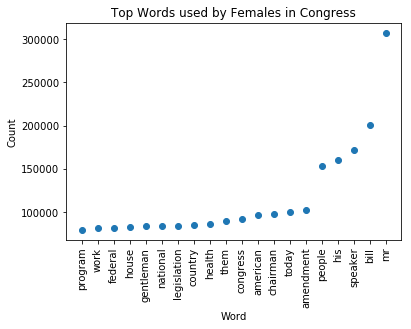

In [24]:
%matplotlib inline
plt.scatter(top_congress_words.Word, top_congress_words.Count) 
plt.ylabel("Count") 
plt.xlabel("Word")
plt.title("Top Words used by Females in Congress")
plt.show()

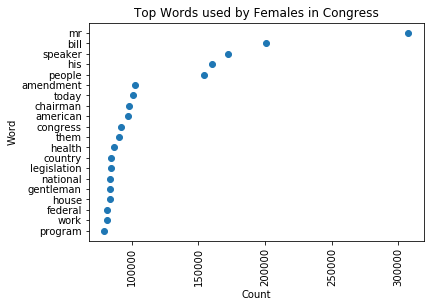

In [27]:
%matplotlib inline
plt.scatter(top_congress_words.Count, top_congress_words.Word) # notice that we've switched the order so that decade is plotted on the x axis
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Word") # don't forget to label the axes
plt.xlabel("Count")
plt.title("Top Words used by Females in Congress") # and label the plot!
plt.show()

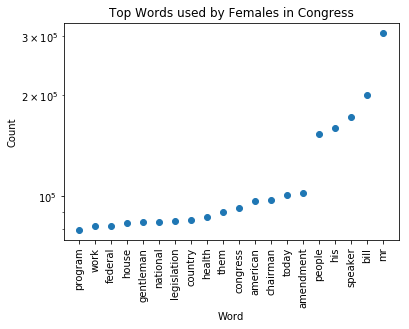

In [32]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(top_congress_words.Word, top_congress_words.Count) # notice that we've switched the order so that decade is plotted on the x axis
plt.yscale("log")
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Count") # don't forget to label the axes
plt.xlabel("Word")
plt.title("Top Words used by Females in Congress") # and label the plot!
plt.show()

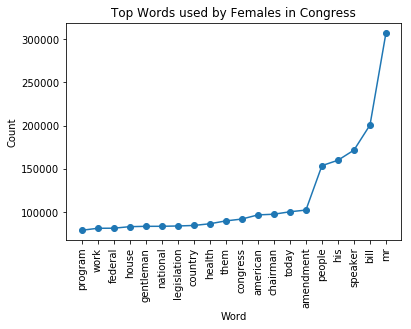

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(top_congress_words.Word, top_congress_words.Count) # notice that we've switched the order so that decade is plotted on the x axis
plt.plot(top_congress_words.Word, top_congress_words.Count)
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Count") # don't forget to label the axes
plt.xlabel("Word")
plt.title("Top Words used by Females in Congress") # and label the plot!
plt.show()

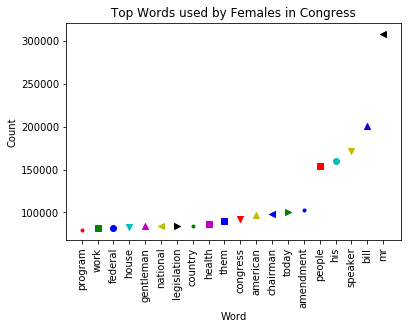

In [31]:
from matplotlib import pyplot as plt 

%matplotlib inline

markers = ["." , "," , "o" , "v" , "^" , "<", ">","." , "," , "," , "v" , "^" , "<", ">","." , "," , "o" , "v" , "^" , "<"]
colors = ['r','g','b','c','m', 'y', 'k','g','m','b','r','y','b','g','b','r','c','y','b','k']


x = x_list
y = y_list

# plt.scatter(top_congress_words.Word, top_congress_words.Count) # notice that we've switched the order so that decade is plotted on the x axis
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Count") # don't forget to label the axes
plt.xlabel("Word")
plt.title("Top Words used by Females in Congress") # and label the plot!

for i in range(20): #for each of the 7 features 
    mi = markers[i] #marker for ith feature 
    xi = x[i] #x array for ith feature .. here is where you would generalize      different x for every feature
    yi = y[i] #y array for ith feature 
    ci = colors[i] #color for ith feature 
    plt.scatter(xi,yi,marker=mi, color=ci) 
plt.show()

In [137]:
directory = '/scratch/group/oit_research_data/stanford_congress/hein-bound/'
file_type = 'txt'
delim ='|'

speeches_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) 
                         for f in glob.glob(directory + "speeches_*"+file_type)])

descr_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE) 
                      for f in glob.glob(directory + "descr_*"+file_type)])

all_congressional_data = pd.merge(speeches_df, descr_df, on='speech_id').fillna(0)

b'Skipping line 207724: expected 2 fields, saw 3\nSkipping line 208494: expected 2 fields, saw 5\n'
b'Skipping line 45205: expected 2 fields, saw 3\nSkipping line 96589: expected 2 fields, saw 3\n'
b'Skipping line 9177: expected 2 fields, saw 3\nSkipping line 9232: expected 2 fields, saw 3\nSkipping line 10391: expected 2 fields, saw 3\nSkipping line 10767: expected 2 fields, saw 3\nSkipping line 19439: expected 2 fields, saw 3\nSkipping line 20135: expected 2 fields, saw 3\nSkipping line 38635: expected 2 fields, saw 3\nSkipping line 46625: expected 2 fields, saw 3\nSkipping line 67408: expected 2 fields, saw 3\nSkipping line 96433: expected 2 fields, saw 3\nSkipping line 111918: expected 2 fields, saw 3\nSkipping line 126420: expected 2 fields, saw 3\nSkipping line 127531: expected 2 fields, saw 3\nSkipping line 142222: expected 2 fields, saw 3\n'
b'Skipping line 7466: expected 2 fields, saw 3\nSkipping line 73461: expected 2 fields, saw 3\nSkipping line 107105: expected 2 fields, sa

Now let's write a function that returns our keyword in context.

In [138]:
all_congressional_data = all_congressional_data[all_congressional_data['speech'] != '[deleted]'] # drop comments that have been deleted 

gender_filter = ('M','...') # specify the subreddits you want to use

all_congressional_data = all_congressional_data[all_congressional_data['gender'].isin(gender_filter)] # filter for the specified subreddits

all_congressional_data['speech'] = all_congressional_data['speech'].str.lower() # transform all words to lower case for consistency 

all_congressional_data['speech'] = all_congressional_data['speech'].str.replace('[^\w\s]','') # remove punctuation

all_congressional_data = all_congressional_data[~all_congressional_data['speech'].isna()] # remove posts without commentary

In [139]:
keyword = 'female'

keyword_df = all_congressional_data[all_congressional_data['speech'].str.contains(keyword)].copy() # search the text for the presence of our keyword 

def KWIC(speech):
    n = 5 # specify the number of surrounding words to use before and after the keyword
    
    words = speech.split() # split the words into tokens
    keyword_index = 0
    
    # The following for loop iterates through each word in the text. If our keyword is found, the for loop stores its index. 
    # But, why are we storing the index? As you might remember, the index is a numerical representation of the row's position.
    # It can also be thought of as a unique name the computer uses to identify a row. We can call the index to return JUST these rows.
    for index, word in enumerate(words): 
        if keyword in word: 
            keyword_index = index
            break
    
    before_keyword = words[max(0, keyword_index - n):keyword_index] # store the words that come before the keyword, up to our specified number 
    after_keyword = words[keyword_index:keyword_index + n] # store the words that come after the keyword, up to our specified number 
    return ' '.join(before_keyword + after_keyword) # return the keyword in its context

keyword_df['context'] = keyword_df['speech'].apply(KWIC)

In [140]:
keyword_df[['context']]

,context
3048,gets approximately 17 cents the female operati...
3104,it is a male or female operative finally there...
11660,place for the treatment of female addicts in t...
13131,male domestics 24 cents and female domestics 2...
21276,the average pay is 2028 female weavers in the ...
...,...
17384007,issue raised about allmale or allfemale choirs...
17385194,origin be they male or femaleare full and free...
17385417,6 corrects terminology to cover female judges ...
17388098,social necessity the number of female heads of...


This data frame is a little difficult to look at, so I am going to export the contents to a file. 

In [141]:
keyword_df['context'].to_csv('KWIC_example_keyword_female.csv', sep = ' ', index=False)

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


> gets approximately 17 cents the female operative gets approximately 9

> it is a male or female operative finally there has

> place for the treatment of female addicts in the united

> male domestics 24 cents and female domestics 23 cents bear

> the average pay is 2028 female weavers in the north

> law between the male and female ancestors or descendants thus

> including pension i males i females 6 state tax mr

> that every child male and female when it comes on

> and stenographers and nurses and female clerks get much good

> help and 581 percent of female help were paid less

> on the bureaucrats male and female in the department of

> figures include both male and female when we consider what

> the dressmakers the needleworkers the female clerks the nurses and

> six dresses available for every female child and two or

> of every ablebodied male and female citizen between 21 practical

> of humanity both male and female who seem only to

> a kindly friend male or female may be the only

> were males and 10000000 were females we had house resolve

> and said is that a female ox and that fellow